In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, f1_score, precision_score, recall_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.shape

(253680, 22)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
"""
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64   # Tiene diabetes? si (1) o no(0)
 1   HighBP                253680 non-null  float64   # Tiene presion arterial alta? si(1) o no(0)
 2   HighChol              253680 non-null  float64   # Tiene el colesterol alto? (1 = sí, 0 = no).
 3   CholCheck             253680 non-null  float64   # Ha realizado un chequeo de colesterol en los últimos años? (1 = sí, 0 = no).
 4   BMI                   253680 non-null  float64   # NUMERICO
 5   Smoker                253680 non-null  float64   # Fuma? (1 = sí, 0 = no).
 6   Stroke                253680 non-null  float64   # Tubo ataque cerebrovascular? (1 = sí, 0 = no).
 7   HeartDiseaseorAttack  253680 non-null  float64   # Tubo enfermedad cardíaca o ataque al corazón? (1 = sí, 0 = no).
 8   PhysActivity          253680 non-null  float64   # Realiza actividad fisica (1 = sí, 0 = no).
 9   Fruits                253680 non-null  float64   # Consume frutas? (1 = sí, 0 = no).
 10  Veggies               253680 non-null  float64   # Consume verduras? (1 = sí, 0 = no).
 11  HvyAlcoholConsump     253680 non-null  float64   # Consume alcohol? (1 = sí, 0 = no).
 12  AnyHealthcare         253680 non-null  float64   # Tiene algún tipo de seguro o acceso a atención médica? (1 = sí, 0 = no).
 13  NoDocbcCost           253680 non-null  float64   # La persona no visitó al médico por razones de costo (1 = sí, 0 = no).
 14  GenHlth               253680 non-null  float64   # Salud general
 15  MentHlth              253680 non-null  float64   # Salud mental (numero de dias) NUMERICO
 16  PhysHlth              253680 non-null  float64   # Salud fisica (numero de dias) NUMERICO
 17  DiffWalk              253680 non-null  float64   # Tiene dificultad para caminar? (1 = sí, 0 = no).
 18  Sex                   253680 non-null  float64   # Sexo (m o f)
 19  Age                   253680 non-null  float64   # Edad (en intervalos)
 20  Education             253680 non-null  float64   # Educación (en intervalos)
 21  Income                253680 non-null  float64   # Ingreso NUMERICO
"""

'\n #   Column                Non-Null Count   Dtype  \n---  ------                --------------   -----  \n 0   Diabetes_binary       253680 non-null  float64   # Tiene diabetes? si (1) o no(0)\n 1   HighBP                253680 non-null  float64   # Tiene presion arterial alta? si(1) o no(0)\n 2   HighChol              253680 non-null  float64   # Tiene el colesterol alto? (1 = sí, 0 = no).\n 3   CholCheck             253680 non-null  float64   # Ha realizado un chequeo de colesterol en los últimos años? (1 = sí, 0 = no).\n 4   BMI                   253680 non-null  float64   # NUMERICO\n 5   Smoker                253680 non-null  float64   # Fuma? (1 = sí, 0 = no).\n 6   Stroke                253680 non-null  float64   # Tubo ataque cerebrovascular? (1 = sí, 0 = no).\n 7   HeartDiseaseorAttack  253680 non-null  float64   # Tubo enfermedad cardíaca o ataque al corazón? (1 = sí, 0 = no).\n 8   PhysActivity          253680 non-null  float64   # Realiza actividad fisica (1 = sí, 0 = no

In [7]:
#CONTEO DE LA VARIABLE OBJETIVO#
count = df["Diabetes_binary"].value_counts()
count

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [8]:
print("Porcentaje clases variable objetivo:")
print(f"Clase con diabetes: {100*count[1]/count.sum():.2f}%")
print(f"Clase sin diabetes: {100*count[0]/count.sum():.2f}%")

Porcentaje clases variable objetivo:
Clase con diabetes: 13.93%
Clase sin diabetes: 86.07%


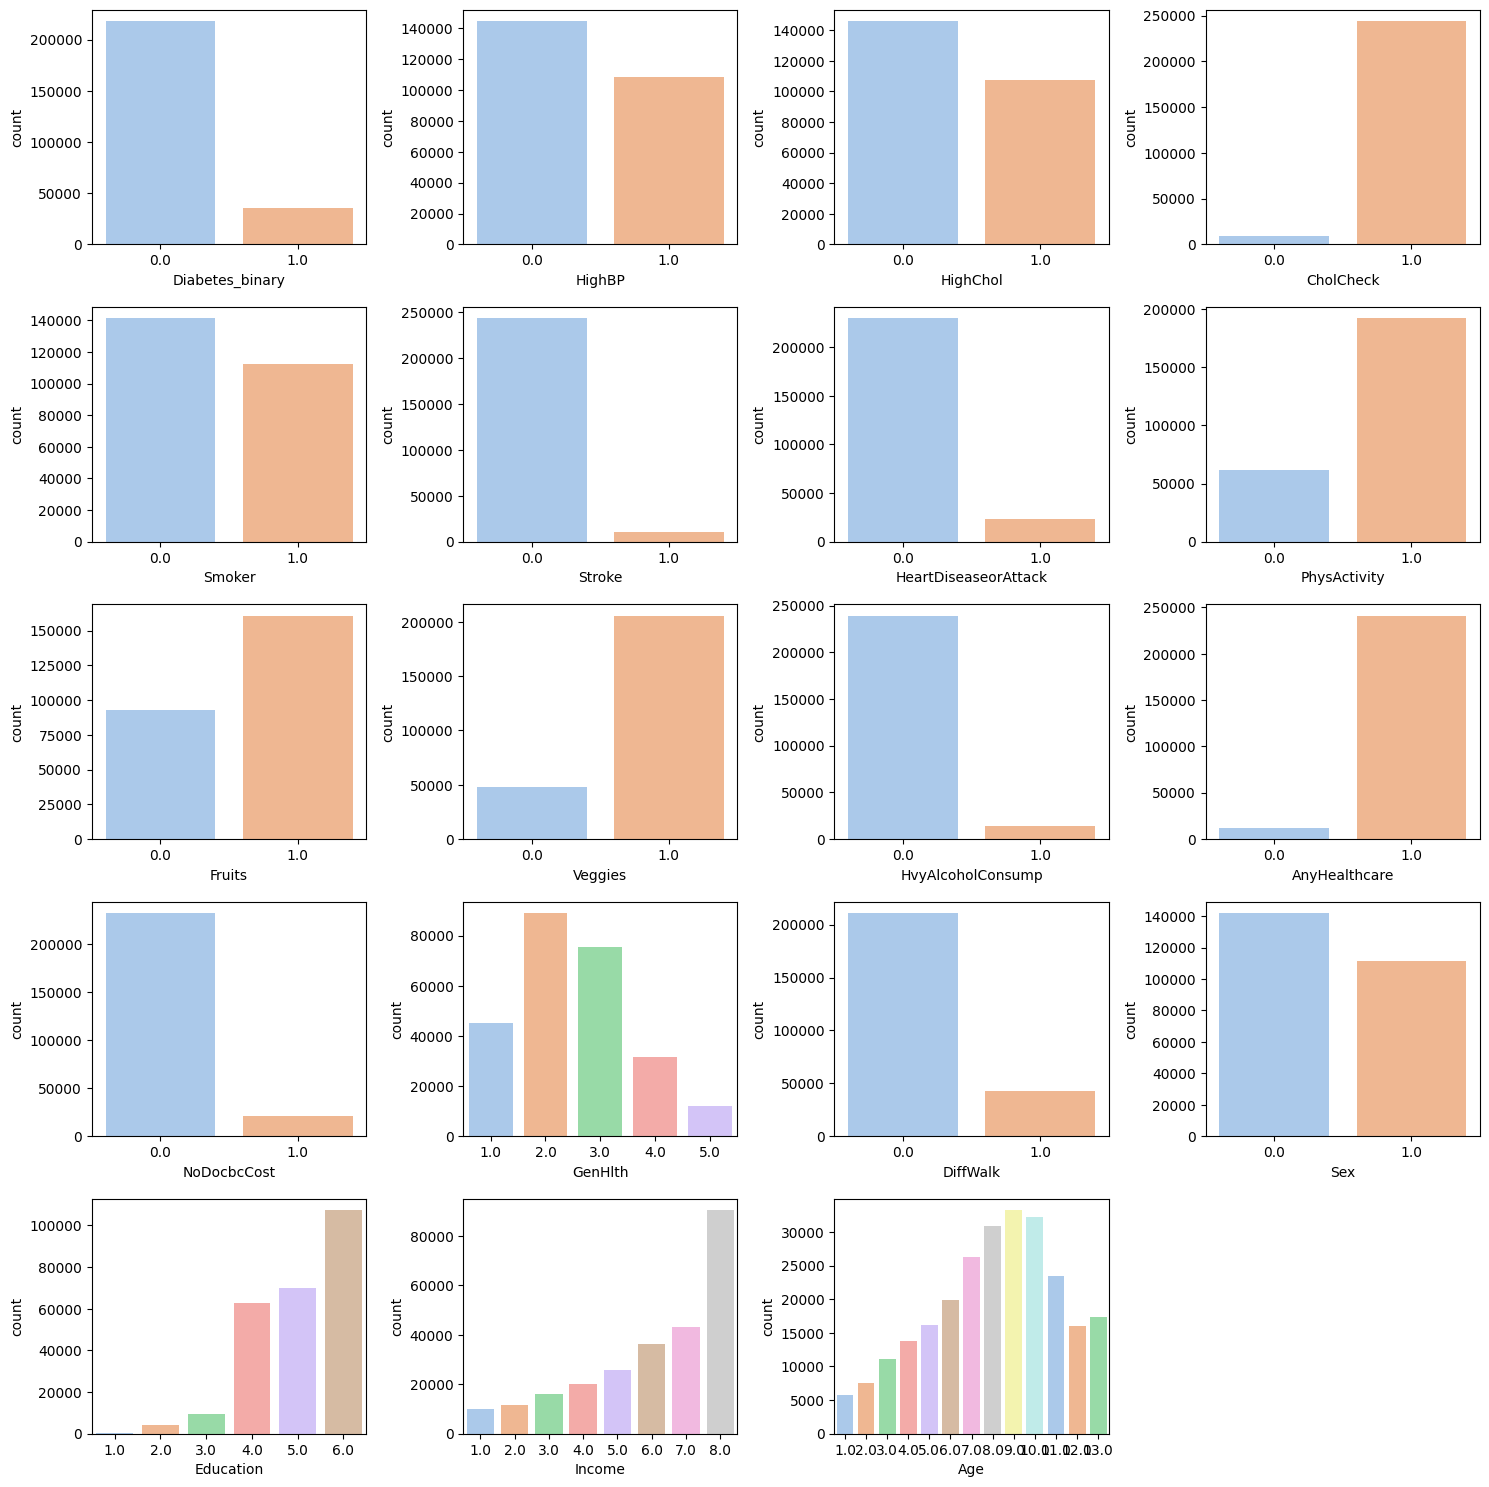

In [9]:
# Analysis of Categorical Variables
# ["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", 
# "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Education", "Income", "Age"]

fig, axis = plt.subplots(5, 4, figsize = (15, 15))

sns.countplot(ax = axis[0, 0], data = df, x = "Diabetes_binary", palette='pastel', hue= "Diabetes_binary", legend=False)
sns.countplot(ax = axis[0, 1], data = df, x = "HighBP", palette='pastel', hue= "HighBP", legend=False)
sns.countplot(ax = axis[0, 2], data = df, x = "HighChol", palette='pastel', hue= "HighChol", legend=False)
sns.countplot(ax = axis[0, 3], data = df, x = "CholCheck", palette='pastel', hue= "CholCheck", legend=False)
sns.countplot(ax = axis[1, 0], data = df, x = "Smoker", palette='pastel', hue= "Smoker", legend=False)
sns.countplot(ax = axis[1, 1], data = df, x = "Stroke", palette='pastel', hue= "Stroke", legend=False)
sns.countplot(ax = axis[1, 2], data = df, x = "HeartDiseaseorAttack", palette='pastel', hue= "HeartDiseaseorAttack", legend=False)
sns.countplot(ax = axis[1, 3], data = df, x = "PhysActivity", palette='pastel', hue= "PhysActivity", legend=False)
sns.countplot(ax = axis[2, 0], data = df, x = "Fruits", palette='pastel', hue= "Fruits", legend=False)
sns.countplot(ax = axis[2, 1], data = df, x = "Veggies", palette='pastel', hue= "Veggies", legend=False)
sns.countplot(ax = axis[2, 2], data = df, x = "HvyAlcoholConsump", palette='pastel', hue= "HvyAlcoholConsump", legend=False)
sns.countplot(ax = axis[2, 3], data = df, x = "AnyHealthcare", palette='pastel', hue= "AnyHealthcare", legend=False)
sns.countplot(ax = axis[3, 0], data = df, x = "NoDocbcCost", palette='pastel', hue= "NoDocbcCost", legend=False)
sns.countplot(ax = axis[3, 1], data = df, x = "GenHlth", palette='pastel', hue= "GenHlth", legend=False)
sns.countplot(ax = axis[3, 2], data = df, x = "DiffWalk", palette='pastel', hue= "DiffWalk", legend=False)
sns.countplot(ax = axis[3, 3], data = df, x = "Sex", palette='pastel', hue= "Sex", legend=False)
sns.countplot(ax = axis[4, 0], data = df, x = "Education", palette='pastel', hue= "Education", legend=False)
sns.countplot(ax = axis[4, 1], data = df, x = "Income", palette='pastel', hue= "Income", legend=False)
sns.countplot(ax = axis[4, 2], data = df, x = "Age", palette='pastel', hue= "Age", legend=False)

axis[4, 3].axis("off")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


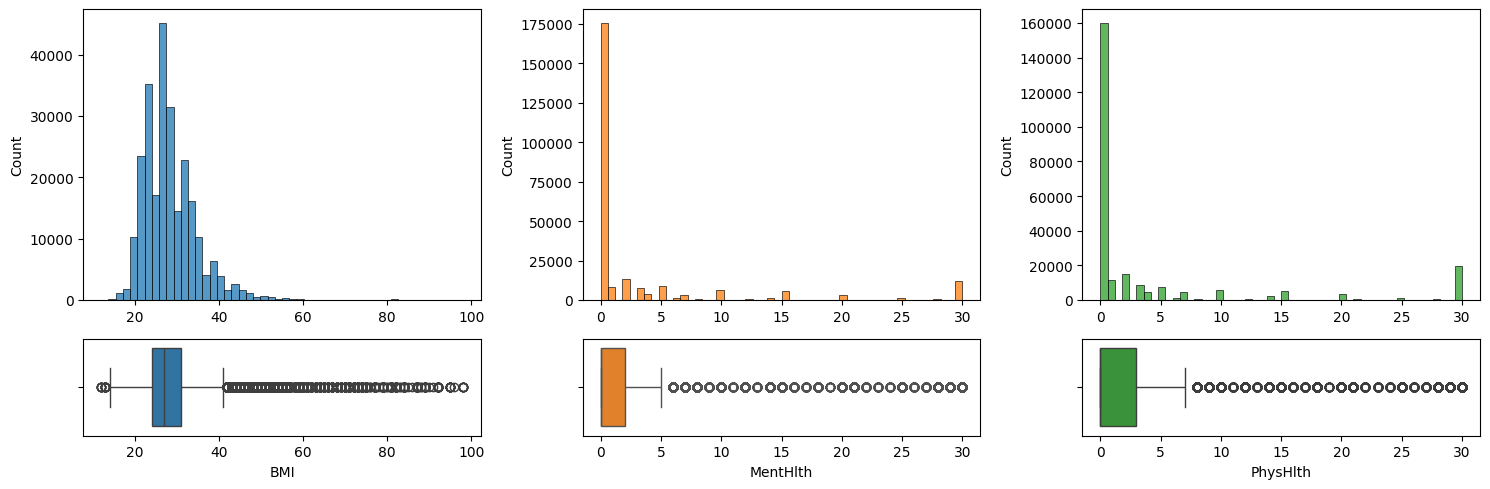

In [11]:
#ANALISIS DE VARIABLES NUMERICAS#

# ["BMI", "MentHlth", "PhysHlth",]
fig, axis = plt.subplots(2, 3, figsize = (15, 5), gridspec_kw={'height_ratios': [3, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "BMI", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "BMI", color="#1f77b4").set(xlabel = "BMI")

sns.histplot(ax = axis[0, 1], data = df, x = "MentHlth", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "MentHlth", color="#ff7f0e").set(xlabel = "MentHlth")

sns.histplot(ax = axis[0, 2], data = df, x = "PhysHlth", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "PhysHlth", color="#2ca02c").set(xlabel = "PhysHlth")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

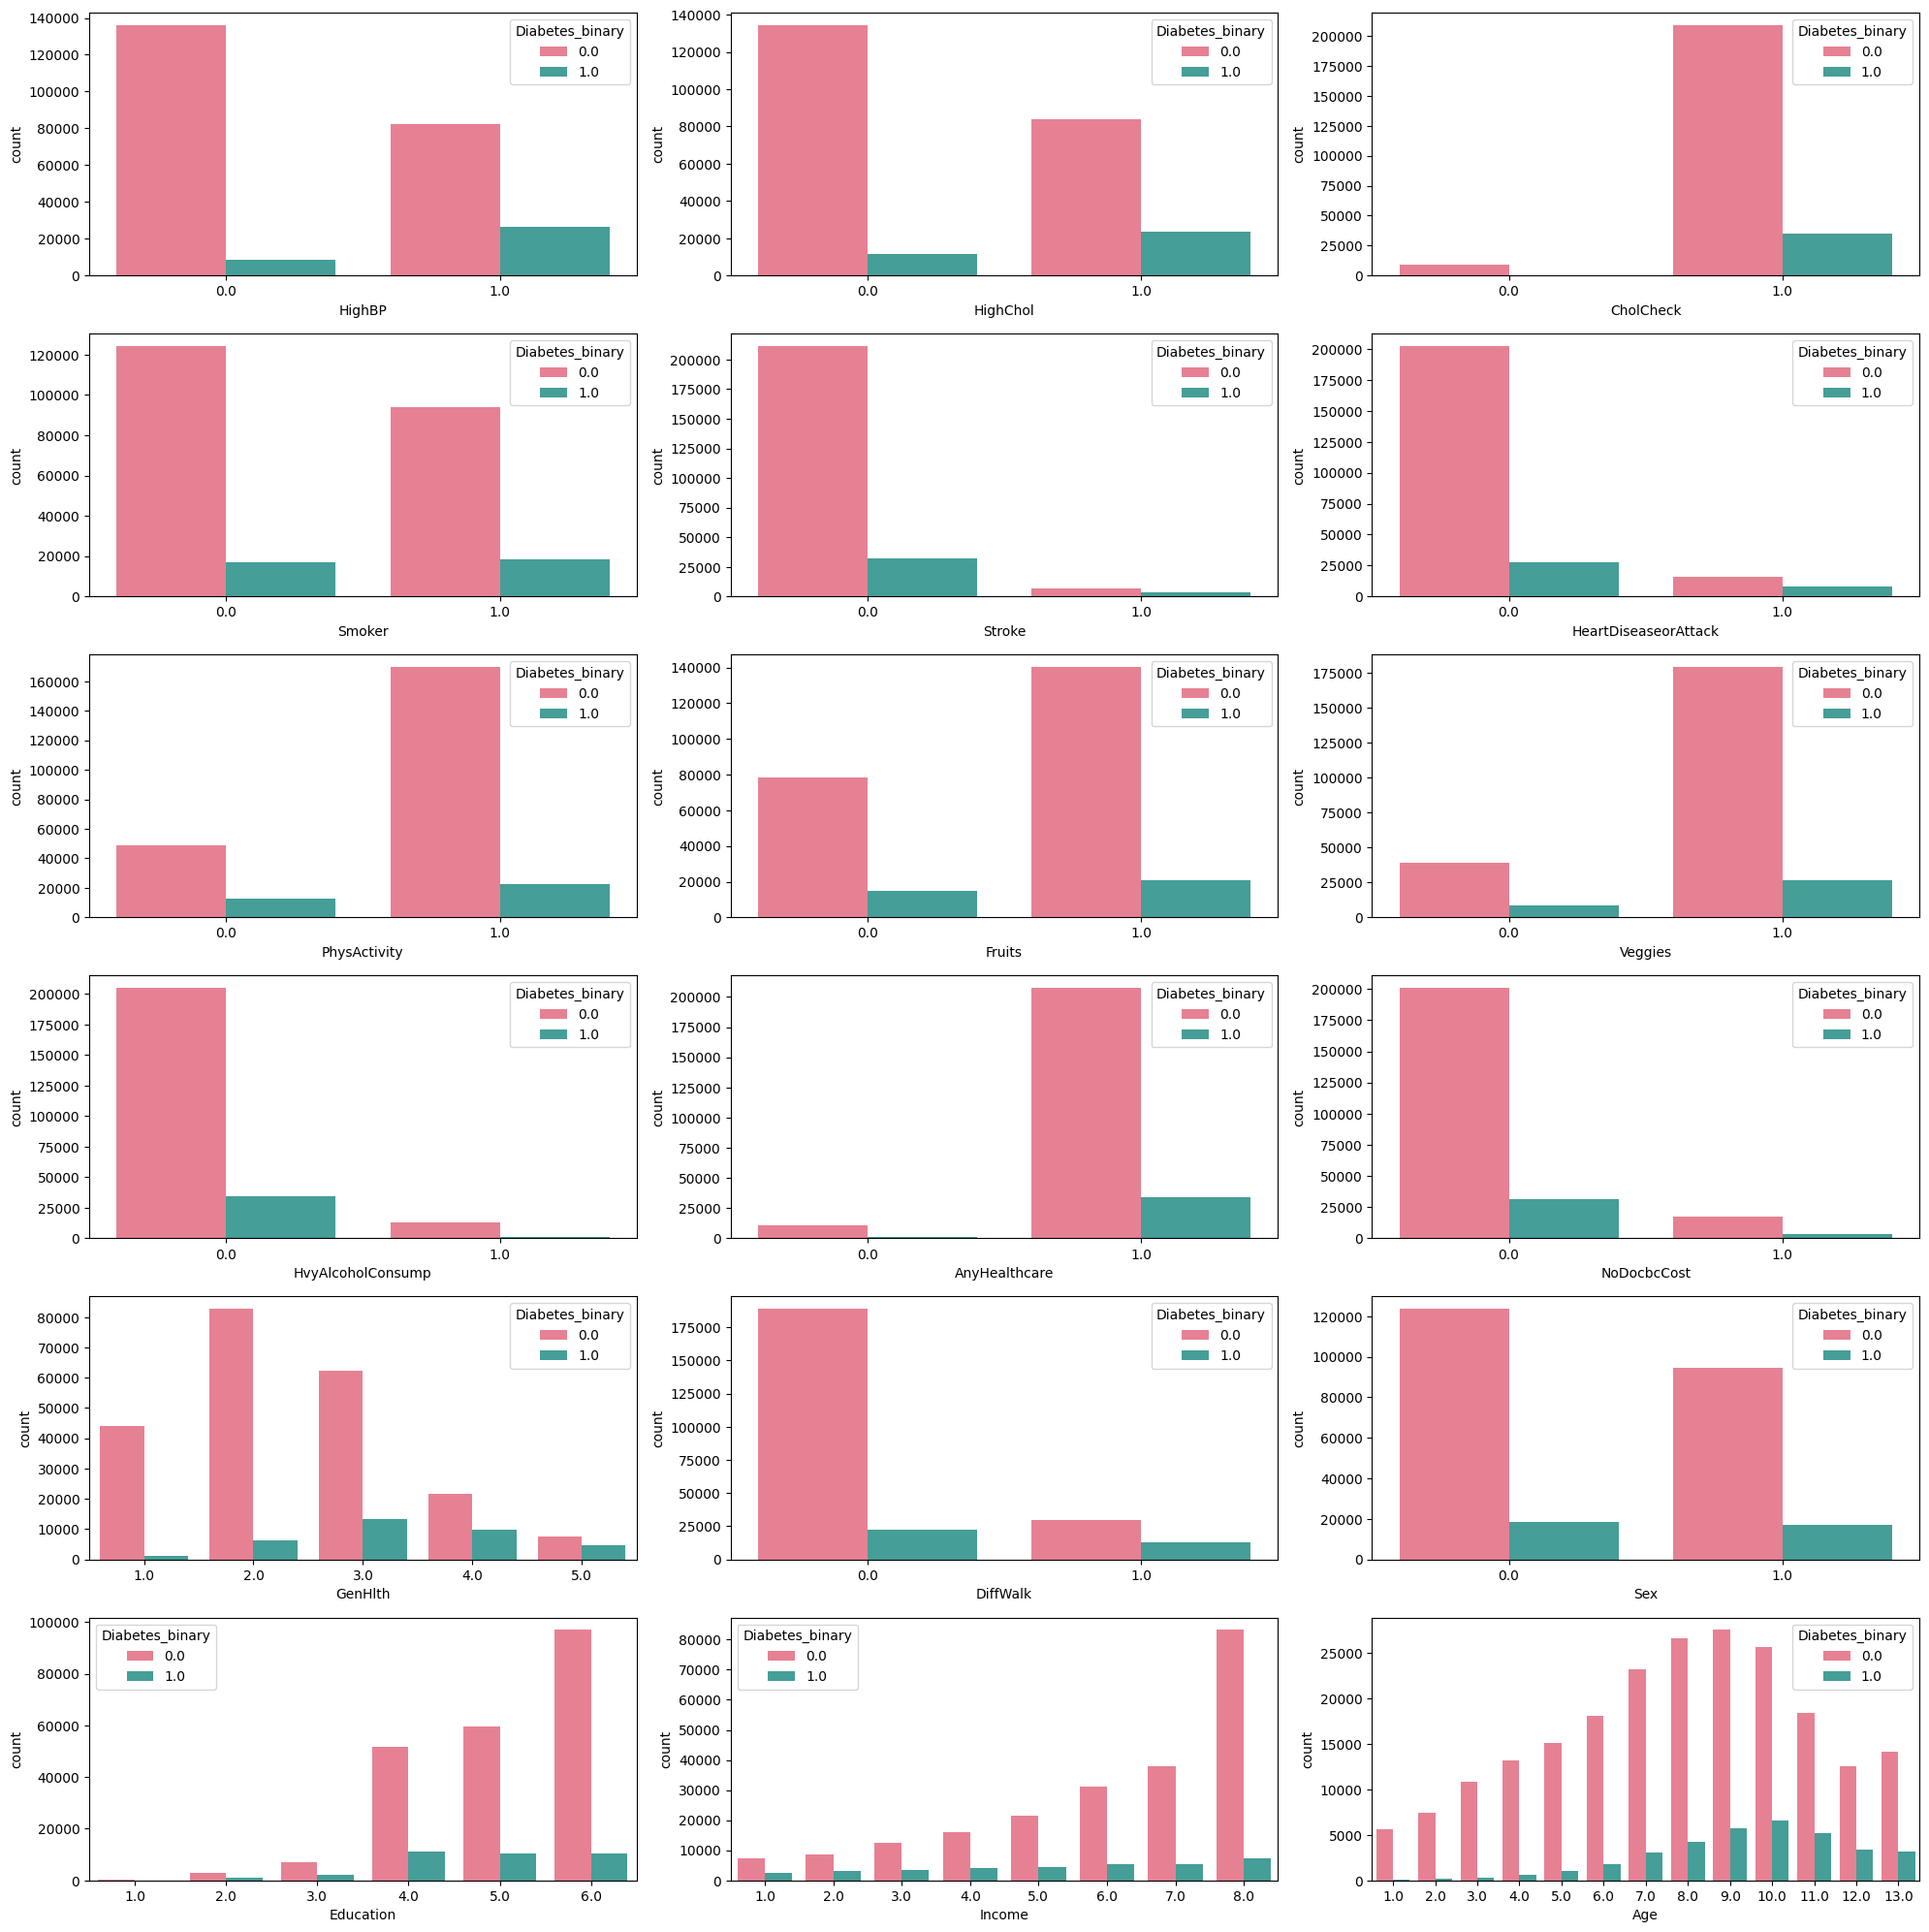

In [ ]:
# Analisis de las variables categoricas con la variable objetivo

fig, axis = plt.subplots(6, 3, figsize = (20, 20))

sns.countplot(ax = axis[0, 0], data = df, x = "HighBP", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[0, 1], data = df, x = "HighChol", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[0, 2], data = df, x = "CholCheck", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[1, 0], data = df, x = "Smoker", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[1, 1], data = df, x = "Stroke", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[1, 2], data = df, x = "HeartDiseaseorAttack", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[2, 0], data = df, x = "PhysActivity", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[2, 1], data = df, x = "Fruits", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[2, 2], data = df, x = "Veggies", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[3, 0], data = df, x = "HvyAlcoholConsump", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[3, 1], data = df, x = "AnyHealthcare", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[3, 2], data = df, x = "NoDocbcCost", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[4, 0], data = df, x = "GenHlth", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[4, 1], data = df, x = "DiffWalk", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[4, 2], data = df, x = "Sex", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[5, 0], data = df, x = "Education", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[5, 1], data = df, x = "Income", palette='husl', hue= "Diabetes_binary", legend=True)
sns.countplot(ax = axis[5, 2], data = df, x = "Age", palette='husl', hue= "Diabetes_binary", legend=True)


# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

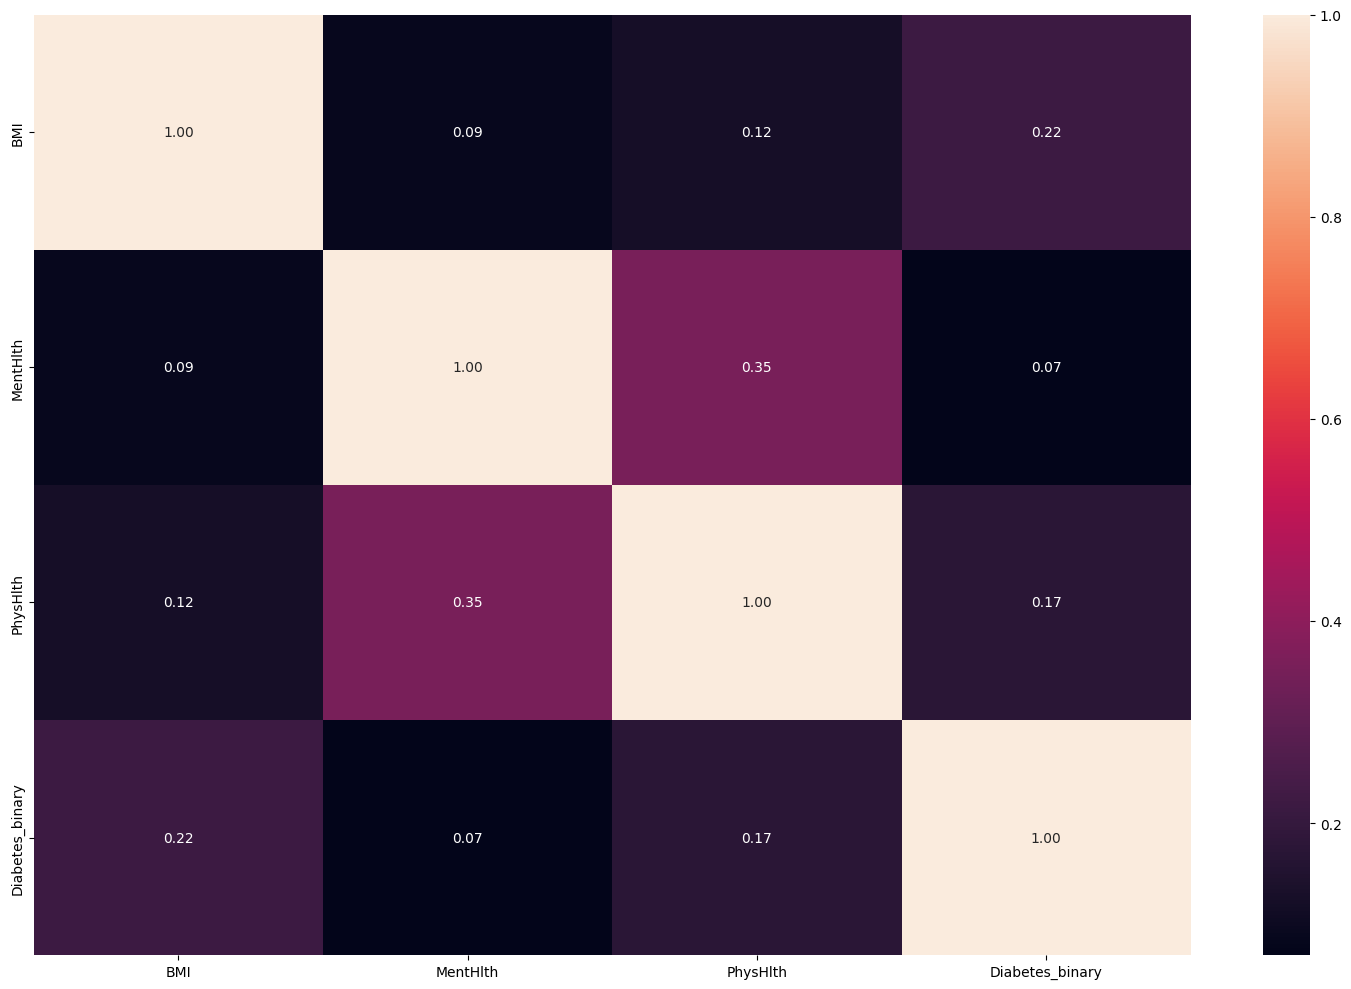

In [ ]:
# Matriz de correlacion de las variables numericas

fig, axis = plt.subplots(figsize = (15, 10))

col_nums = ["BMI", "MentHlth", "PhysHlth", "Diabetes_binary"]

sns.heatmap(df[col_nums].corr(), annot = True, fmt = ".2f")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

Agregando una nueva caracteristica:

In [35]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [36]:
#Estas nuevas caracteristicas mejoran los resultados individualmente, pero al probar combinatorias salen resultados menores

df["Índice_de_Salud_General"] = df["GenHlth"]*df["BMI"]
#df["estilo_de_vida_saludable"] = df["PhysActivity"] * (df["Fruits"] + df["Veggies"])
#df["Estres_y_salud"] = df["Smoker"] * df["HvyAlcoholConsump"]
#df["acceso"] = df["AnyHealthcare"] - df["NoDocbcCost"]

cols_to_drop = ["BMI"]
df = df.drop(cols_to_drop, axis=1)

In [ ]:
# Dividiendo el conjunto de datos en train_test_split. Los train y test data tienen la misma proporcion en cuanto a la variable objetivo
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [38]:
# ML Models
model = XGBClassifier(n_estimators=100, scale_pos_weight=6)
# Training
model.fit(X_train, y_train)
# Predict
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

Accuracy Test:  0.7297579627877641
F1 score Test:  0.44298192159252486
Precision Test:  0.31072609141684715
Recall Test:  0.7712547743669543
Accuracy Train:  0.7430227057710501
F1 score Train:  0.4707744763760351
Precision Train:  0.3301122859948482
Recall Train:  0.8203133288538388


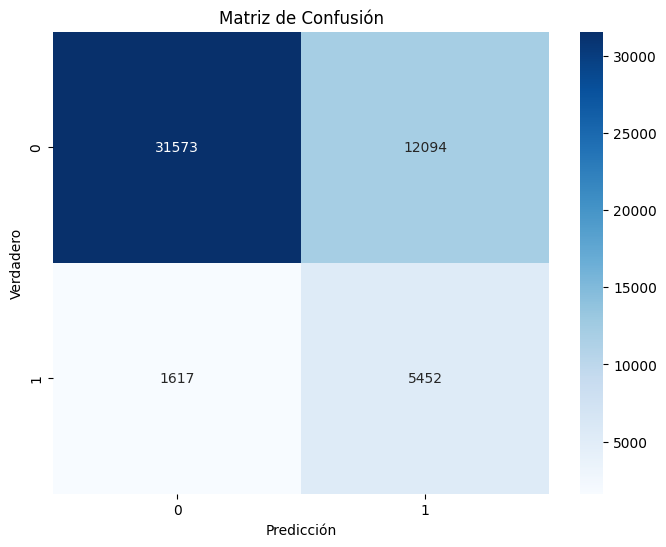

In [39]:
rain = model.predict(X_train)
# Metrics
# Classification
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Graph the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

In [40]:
"""
solo:   0.7648
con v1: 0.7706   #Eliminando el bmi sale 0.7712 y eliminando el GenHlth 0.7678 ----> Entonces nos quedamos con la nueva caracteristica 1 eliminando el BMI
con v2: 0.7672
con v3: 0.7651
con v4: 0.7699
"""

'\nsolo:   0.7648\ncon v1: 0.7706   #Eliminando el bmi sale 0.7712 y eliminando el GenHlth 0.7678 ----> Entonces nos quedamos con la nueva caracteristica 1 eliminando el BMI\ncon v2: 0.7672\ncon v3: 0.7651\ncon v4: 0.7699\n'

# Optimización del modelo

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

parametros = {
    'n_estimators': [100, 200, 300],          # Número de árboles a entrenar (más árboles puede mejorar el resultado, pero también aumenta el tiempo)
    'max_depth': [3, 5, 7],                   # Profundidad máxima de cada árbol (más profundidad = más complejidad)
    'learning_rate': [0.01, 0.05, 0.1],       # Tasa de aprendizaje (cuánto se ajusta el modelo en cada paso)
    'subsample': [0.7, 0.8, 1.0],             # Porcentaje de datos usados para cada árbol (útil para evitar overfitting)
    'colsample_bytree': [0.7, 0.8, 1.0],      # Porcentaje de columnas usadas para cada árbol  
    'scale_pos_weight': [1, 3, 6, 9]              
}

In [42]:
xgb = XGBClassifier(
    eval_metric='logloss',       # Métrica para evaluar durante el entrenamiento
    random_state=42              # Semilla fija para resultados reproducibles
    )

In [43]:
busqueda = RandomizedSearchCV(xgb, parametros, n_iter=30, scoring='recall', cv=3, verbose=1, n_jobs=-1)
busqueda.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'scale_pos_weight': [1, 3, 6, 9],
                                        'subsample': [0.7, 0.8, 1.0]},
                   scoring='recall', verbose=1)

In [44]:
print("Mejores hiperparámetros:", busqueda.best_params_)
print("Mejor Recall:", busqueda.best_score_)

Mejores hiperparámetros: {'subsample': 1.0, 'scale_pos_weight': 9, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Mejor Recall: 0.9054355214793328


In [45]:
# 0.7963715088709052 con el gridsearch
# con los 3 hiperparametros: 0.8849948381013593
# con los del inicio
best_model = busqueda.best_estimator_
y_pred_test = best_model.predict(X_test)

Accuracy Test:  0.6047579627877641
F1 score Test:  0.38879575726172694
Precision Test:  0.2477855477855478
Recall Test:  0.902249257320696
Accuracy Train:  0.7430227057710501
F1 score Train:  0.4707744763760351
Precision Train:  0.3301122859948482
Recall Train:  0.8203133288538388


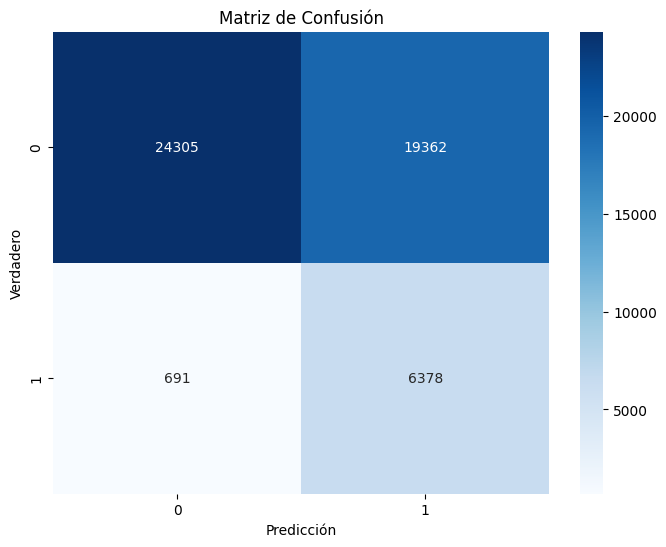

In [46]:
train = best_model.predict(X_train)
# Metrics
# Classification
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Graph the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

In [49]:
from pickle import dump
dump(best_model, open("models/modelo_optimo_1.0_9_100_7_0.01_0.7_42.sav", "wb"))